<a href="https://colab.research.google.com/github/sejinseo/Python/blob/main/ml03_train_test_scaling_%EB%B3%B5%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 머신 러닝의 과정
    * 문제 정의 --> 데이터 준비 --> 데이터 탐색 --> 훈련 셋, 검증 셋, 데스트 셋 분리 --> 모델 선택, 훈련 --> 모델 평가 --> 모델 튜닝
* 훈련 셋, 검증 셋, 테스트 셋으로 나누는 방법
    * 순차 추출(sequential sampling): 순서대로, 거의 사용 안함
    * 임의 추출(random samplilng): 임의로
    * 층화 추출(stratified sampling): 각 클래스의 비율대로 추출
* 분류 모델 평가 지표
    * 정확도(accuracy)
    * 정밀도(precision)
    * 재현율(recall)
    * F1-score
    * 민감도(sensitivity)
    * 특이도
* 특성 스케일링
    * 표준화(standardization)
    * 정규화(normalization)

# 필요한 모듈, 클래스, 함수들 import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 머신 러닝 모델(알고리즘) - KNN 분류기
from sklearn.neighbors import KNeighborsClassifier
# 훈련/테스트 셋 분리 함수
from sklearn.model_selection import train_test_split
# 모델 평가 지표 함수
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, f1_score
# 특성 스케일링
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 데이터 준비
    * fish.csv파일: 어종, 특성들(무게, 길이,...)
    * 2진 분류(도미, 빙어)
    * 특성 2개(무게, 길이)만 사용

In [2]:
fish_csv = 'https://github.com/JakeOh/202110_itw_lab_python/raw/main/fish.csv'

In [3]:
fish = pd.read_csv(fish_csv)

In [4]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [5]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [6]:
df = fish.loc[fish['Species'].isin(['Bream', 'Smelt']),
          ['Species', 'Weight', 'Length']]

In [7]:
df.head()

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [8]:
# DataFrame을 특성과 타겟으로 분리하고 ndarray(배열)로 변환
features = df.iloc[:, 1:].values
target = df['Species'].values

In [9]:
features.shape

(49, 2)

In [10]:
target.shape

(49,)

In [11]:
features[:5, :]

array([[242. ,  25.4],
       [290. ,  26.3],
       [340. ,  26.5],
       [363. ,  29. ],
       [430. ,  29. ]])

In [12]:
target[:5]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [13]:
np.unique(target, return_counts=True)

(array(['Bream', 'Smelt'], dtype=object), array([35, 14]))

# 훈련 셋, 테스트 셋 분리

훈련 셋: 테스트 셋 = 7:3

# 순차 추출(sequential sampling)

In [14]:
49 * 0.7, 49 * 0.3

(34.3, 14.7)

In [15]:
num_test = 35

In [16]:
X_train = features[:num_test, :] # 훈련 셋
y_train = target[:num_test] # 훈련 레이블
X_test = features[num_test:, :] # 테스트 셋
y_test = target[num_test:] # 테스트 레이블

In [17]:
np.unique(y_train)

array(['Bream'], dtype=object)

In [18]:
np.unique(y_test)

array(['Smelt'], dtype=object)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    train_size=35,
                                                    shuffle=False)

In [20]:
X_train.shape, X_test.shape

((35, 2), (14, 2))

In [21]:
y_train.shape, y_test.shape

((35,), (14,))

In [22]:
np.unique(y_train)

array(['Bream'], dtype=object)

In [23]:
np.unique(y_test)

array(['Smelt'], dtype=object)

훈련 셋과 테스트 셋 시각화

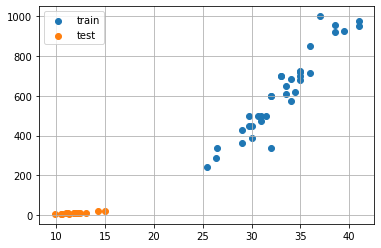

In [24]:
plt.scatter(X_train[:, 1], X_train[:, 0], label='train')
plt.scatter(X_test[:, 1], X_test[:, 0], label="test")

plt.legend()
plt.grid()
plt.show()

KNN 분류기 훈련, 예측, 평가

In [25]:
knn = KNeighborsClassifier()

In [26]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
train_pred = knn.predict(X_train)
train_pred

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream'],
      dtype=object)

In [28]:
y_train

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream'],
      dtype=object)

In [29]:
train_acc = np.mean(train_pred == y_train)
train_acc

1.0

In [30]:
test_pred = knn.predict(X_test)
test_pred

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream'],
      dtype=object)

In [31]:
y_test

array(['Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt',
       'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt'],
      dtype=object)

In [32]:
test_acc = np.mean(test_pred == y_test)
test_acc

0.0

# 임의 추출(Random Sampling)

In [33]:
idx = np.arange(49)
print(idx)
np.random.shuffle(idx)
print(idx)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]
[47 20 33 48  8 46 37  1 32 22 26 12 16 43  2 25  5 42 35 39 34 11 38 31
 14 44  7 23  4 29 45 24 10 36  9 41 27 30  6 28 17 40 19 15 18 21 13  3
  0]


In [34]:
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    train_size=35,
                                                    shuffle=True,
                                                    random_state=42)

In [35]:
X_train.shape, X_test.shape

((35, 2), (14, 2))

In [36]:
y_train.shape, y_test.shape

((35,), (14,))

In [37]:
np.unique(y_train, return_counts=True)

(array(['Bream', 'Smelt'], dtype=object), array([24, 11]))

In [38]:
np.unique(y_test, return_counts=True)

(array(['Bream', 'Smelt'], dtype=object), array([11,  3]))

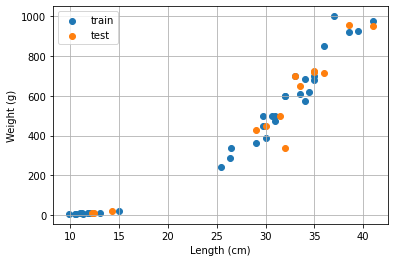

In [39]:
# 훈련 셋, 테스트 셋 시각화
plt.scatter(X_train[:, 1], X_train[:, 0], label='train')
plt.scatter(X_test[:, 1], X_test[:, 0], label='test')

plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.legend()
plt.grid()
plt.show()

# KNN 모델 훈련, 예측, 평가

In [40]:
knn = KNeighborsClassifier()

In [41]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
train_pred = knn.predict(X_train)
print(train_pred)

['Bream' 'Bream' 'Smelt' 'Smelt' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt'
 'Bream' 'Bream' 'Bream' 'Smelt' 'Smelt' 'Bream' 'Smelt' 'Bream' 'Bream'
 'Bream' 'Smelt' 'Bream' 'Bream' 'Smelt' 'Bream' 'Bream' 'Smelt']


In [43]:
y_train

array(['Bream', 'Bream', 'Smelt', 'Smelt', 'Smelt', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream',
       'Bream', 'Bream', 'Bream', 'Smelt', 'Bream', 'Bream', 'Bream',
       'Smelt', 'Smelt', 'Bream', 'Smelt', 'Bream', 'Bream', 'Bream',
       'Smelt', 'Bream', 'Bream', 'Smelt', 'Bream', 'Bream', 'Smelt'],
      dtype=object)

In [44]:
train_acc = knn.score(X_train, y_train)
train_acc

1.0

In [45]:
test_pred = knn.predict(X_test)
test_pred

array(['Bream', 'Smelt', 'Smelt', 'Smelt', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream'],
      dtype=object)

In [46]:
y_test

array(['Bream', 'Smelt', 'Smelt', 'Smelt', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream'],
      dtype=object)

In [47]:
test_acc = knn.score(X_test, y_test)
test_acc

1.0

# 층화 추출

데이터 셋에서 각 클래스(도미, 빙어)의 비율이 훈련 셋과 테스트 셋에서 비슷하게 유지되도록 샘플링을 하는 방법.

In [49]:
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.3,
                                                    stratify=target,
                                                    random_state=42)

`train_test_split` 함수 파라미터 설명 train_szie: 훈련 셋의 개수(비율), test_size: 테스트 셋의 개수(비율) train_size 또는 test_size 중 하나만 값(argument)을 전달하면 다른 하나는 자동으로 계산됨. * 정수로 값을 전달한 경우는 훈련(테스트) 셋의 샘플 개수를 의미. * 0 ~ 1 사이의 실수로 값을 전달한 경우에는, 전체 샘플 중 훈련(테스트) 셋의 비율을 의미.

    * stratify: 층화 추출의 기준이 되는(각 클래스의 비율을 알 수 있는) 1차원 배열.
    * random_state: 난수 생성 seed 설정.
    * shuffle: 샘플들을 섞을 지 말 지를 결정. 기본값은 True.

In [50]:
X_train.shape, X_test.shape

((34, 2), (15, 2))

In [51]:
y_train.shape, y_test.shape

((34,), (15,))

In [55]:
# 훈련 셋에서 도미(Bream)/빙어(Smelt)의 빈도수
np.unique(y_train, return_counts=True)

(array(['Bream', 'Smelt'], dtype=object), array([24, 10]))

In [57]:
# 테스트 셋에서 도미/빙어 빈도수
np.unique(y_test, return_counts=True)

(array(['Bream', 'Smelt'], dtype=object), array([11,  4]))

# KNN 모델 훈련, 예측, 평가

In [58]:
knn = KNeighborsClassifier()

In [59]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [60]:
train_pred = knn.predict(X_train)
train_pred

array(['Bream', 'Bream', 'Bream', 'Smelt', 'Bream', 'Smelt', 'Smelt',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Smelt', 'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream',
       'Smelt', 'Bream', 'Bream', 'Smelt', 'Smelt', 'Bream'], dtype=object)

In [61]:
y_train

array(['Bream', 'Bream', 'Bream', 'Smelt', 'Bream', 'Smelt', 'Smelt',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Smelt', 'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream',
       'Smelt', 'Bream', 'Bream', 'Smelt', 'Smelt', 'Bream'], dtype=object)

In [63]:
train_acc = knn.score(X_train, y_train)
train_acc

1.0

In [64]:
test_pred = knn.predict(X_test)
test_pred

array(['Smelt', 'Bream', 'Bream', 'Bream', 'Smelt', 'Smelt', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Smelt'], dtype=object)

In [65]:
y_test

array(['Smelt', 'Bream', 'Bream', 'Bream', 'Smelt', 'Smelt', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Smelt'], dtype=object)

In [67]:
test_acc = knn.score(X_test, y_test)
test_acc

1.0

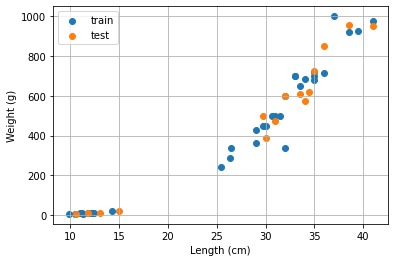

In [72]:
# 훈련 셋, 테스트 셋 시각화
plt.scatter(X_train[:, 1], X_train[:, 0], label='train')
plt.scatter(X_test[:, 1], X_test[:, 0], label='test')

plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.legend()
plt.grid()
plt.show()

# 분류 모델 평가 지표

In [73]:
# 테스트 셋의 오차 행렬(confusion matrix, 혼돈 행렬, 혼동 행렬)
confusion_matrix(y_true=y_test, y_pred=test_pred)

array([[11,  0],
       [ 0,  4]])

In [74]:
report = classification_report(y_true=y_test, y_pred=test_pred)
print(report)

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        11
       Smelt       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



# 특성 스케일링(feature scaling)

    * 표준화(standardization)
        * 모든 특성의 평균이 0, 표준편차가 1이 되도록 스케일을 변환.
        * x_scaled = (x-평균) / 표준화
        * StandardScaler
    * 정규화(normalization)
        * 모든 특성의 최솟값이 0, 최댓값이 1이 되도록 스케일을 변환.
        * x_scaled = (x-min) / (max - min)\
        * MinMaxScaler

# 특성 스케일리의 필요성

[150g, 25cm] 특성을 갖는 가상의 물고기의 예측값?

In [75]:
test_fish = [[150, 25]]
prediction = knn.predict(test_fish)
prediction

array(['Smelt'], dtype=object)

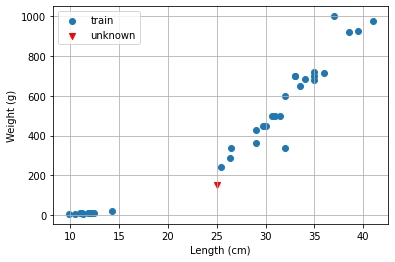

In [79]:
# 훈련 셋, 가상의 테스트 물고기 시각화
plt.scatter(X_train[:, 1], X_train[:, 0], label='train')
plt.scatter(x=25, y=150, label='unknown', marker='v', color='red')

plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.legend()
plt.grid()
plt.show()

# 표준화(Standardization)

In [80]:
std_scaler = StandardScaler()

In [81]:
std_scaler.fit(X_train)

StandardScaler()

In [83]:
print(std_scaler.mean_)
print(std_scaler.var_)

[425.92352941  26.47352941]
[1.04229779e+05 1.03194299e+02]


In [84]:
np.mean(X_train, axis=0)

array([425.92352941,  26.47352941])

In [85]:
np.var(X_train, axis=0)

array([1.04229779e+05, 1.03194299e+02])

In [86]:
X_tr_scaled = std_scaler.transform(X_train)

In [87]:
X_tr_scaled[:5, :]

array([[ 0.89230202,  0.93778693],
       [-0.19490239,  0.24870607],
       [-0.56969366, -0.10567837],
       [-1.28861145, -1.44446404],
       [ 0.5391929 ,  0.54402644]])

In [88]:
np.mean(X_tr_scaled, axis=0)

array([-1.95921710e-16,  1.01226217e-16])

In [89]:
np.std(X_tr_scaled, axis=0)

array([1., 1.])

In [90]:
X_te_scaled = std_scaler.transform(X_test)

In [91]:
X_te_scaled[:5, :]

array([[-1.25763696, -1.12945564],
       [ 1.31355502,  0.93778693],
       [ 1.63878711,  1.18388724],
       [ 0.60114187,  0.79012675],
       [-1.29759405, -1.56259218]])

In [92]:
test_fish_scaled = std_scaler.transform(test_fish)
print(test_fish_scaled)

[[-0.85465892 -0.14505442]]


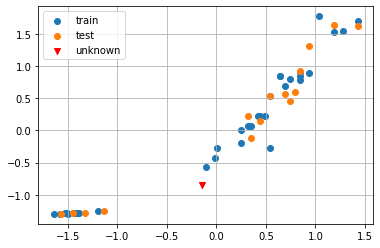

In [98]:
# 스케일이 변환된 훈련 셋, 테스트 셋 시각화
plt.scatter(X_tr_scaled[:, 1], X_tr_scaled[:, 0], label='train')
plt.scatter(X_te_scaled[:, 1], X_te_scaled[:, 0], label='test')
plt.scatter(test_fish_scaled[:, 1], test_fish_scaled[:, 0], label="unknown", marker='v', color='red')

plt.legend()
plt.grid()
plt.show()

# StandardScaler를 적용한 훈련 셋으로 훈련, 예측, 평가

In [99]:
knn = KNeighborsClassifier()

In [100]:
knn.fit(X_tr_scaled, y_train)

KNeighborsClassifier()

In [101]:
knn.score(X_tr_scaled, y_train)

1.0

In [102]:
knn.score(X_te_scaled, y_test)

1.0

In [103]:
knn.predict(test_fish_scaled)

array(['Bream'], dtype=object)

# 정규화(Normalization)

In [104]:
norm_scaler = MinMaxScaler()

In [107]:
# 정규화를 하기 위해서 훈련 셋의 최솟값과 최댓값을 찾고, 훈련 셋의 특성들의 스케일을 변환
# norm_scaler.fit(X_train)
# norm_scaler.transform(X_train)
X_tr_norm = norm_scaler.fit_transform(X_train)

In [109]:
norm_scaler.data_max_

array([1000.,   41.])

In [110]:
norm_scaler.data_min_

array([6.7, 9.8])

In [111]:
X_te_norm = norm_scaler.transform(X_test)

In [112]:
test_fish_norm = norm_scaler.transform(test_fish)

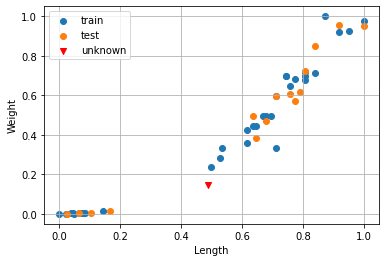

In [117]:
# 정규화된 훈련 셋, 테스트 셋 시각화
plt.scatter(X_tr_norm[:, 1], X_tr_norm[:, 0], label='train')
plt.scatter(X_te_norm[:, 1], X_te_norm[:, 0], label='test')
plt.scatter(test_fish_norm[:, 1], test_fish_norm[:, 0], marker='v', color='red', label='unknown')

plt.xlabel('Length')
plt.ylabel('Weight')
plt.legend()
plt.grid()
plt.show()

# 정규화가 된 훈련 셋 훈련, 예측, 평가

In [118]:
knn = KNeighborsClassifier()

In [119]:
knn.fit(X_tr_norm, y_train)

KNeighborsClassifier()

In [120]:
knn.score(X_tr_norm, y_train)

1.0

In [121]:
knn.score(X_te_norm, y_test)

1.0

In [122]:
knn.predict(test_fish_norm)

array(['Bream'], dtype=object)